<a href="https://colab.research.google.com/github/ibonetc/ML_Doct_MSc/blob/main/ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
n_samples = 1000
circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)

In [3]:
X,Y=circles

In [4]:
X = StandardScaler().fit_transform(X)

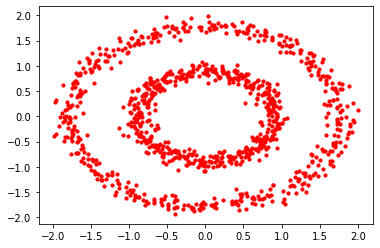

In [5]:
plt.scatter(X[:, 0], X[:, 1], s=10, c="red" )

## Kmeans

In [6]:
k=2

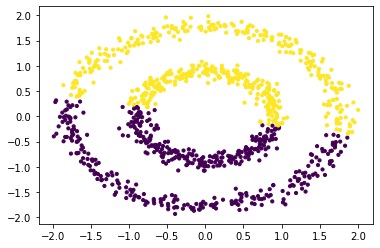

In [7]:
k_means=cluster.KMeans(n_clusters=k,random_state=7)
y_pred=k_means.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

## Agglomerative

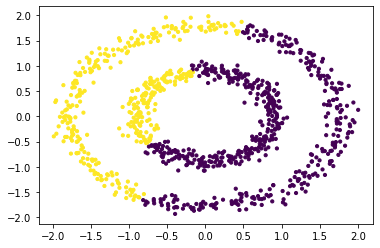

In [8]:
ward = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
y_pred=ward.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

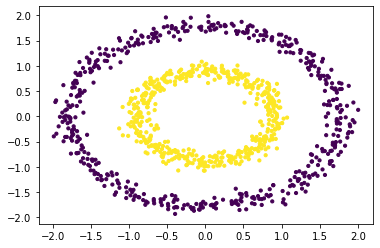

In [9]:
Agglom_Link = cluster.AgglomerativeClustering(n_clusters=k,  linkage='single')
y_pred=Agglom_Link.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

## DBSCAN

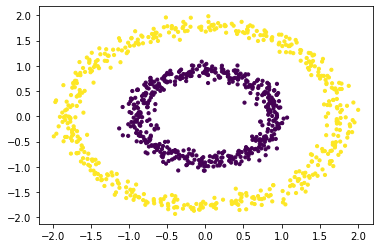

In [10]:
dbscan = cluster.DBSCAN(eps=.3)
dbscan.fit(X)
y_pred=dbscan.labels_.astype(np.int32)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

# Comparando algunos métodos de clustering con bases de datos distribuidas con diferente forma

Vamos a usar las siguientes 4 bases de datos:

In [11]:
moons = datasets.make_moons(n_samples=n_samples, noise=0.08)
blobs = datasets.make_blobs(n_samples=n_samples,cluster_std=1.0, random_state=7)
no_structure = np.random.rand(n_samples, 2), None
databases = [circles, moons,no_structure,blobs]
name_databases=['circles','moons','no_structure','blobs']

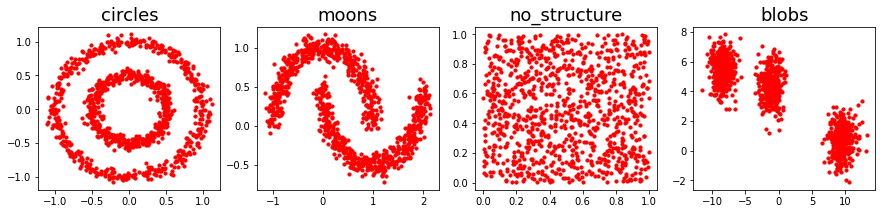

In [12]:
plt.figure(figsize=(15,3))
for i, (name, data) in enumerate(zip(name_databases,databases)):
  X, y = data
  plt.subplot(1,len(databases), i+1)
  plt.title(name, size=18)
  plt.scatter(X[:, 0], X[:, 1], s=10, c='red')

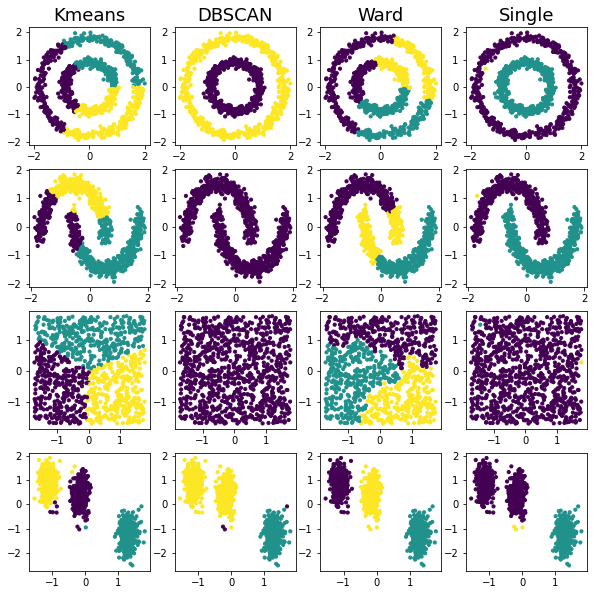

In [13]:
k=3
index_plot=1
plt.figure(figsize=(10,10))
for i_dataset, data in enumerate(databases):
  X, y = data
  X = StandardScaler().fit_transform(X)
  k_means=cluster.KMeans(n_clusters=k)
  ward = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
  single = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
  dbscan = cluster.DBSCAN(eps=.3)
  cluster_methods=(('Kmeans', k_means),('DBSCAN', dbscan),('Ward', ward),('Single',single))
  for name, algorithm in cluster_methods:
    algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int32)
    else:
        y_pred = algorithm.predict(X)
    plt.subplot(len(databases), len(cluster_methods), index_plot)
    if i_dataset == 0:
            plt.title(name, size=18)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
    index_plot+=1
plt.show()

## Clustering Jerárquico

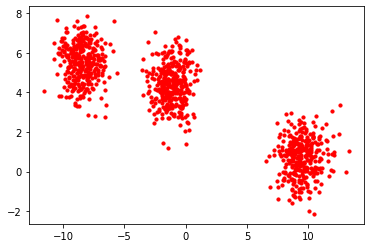

In [14]:
X, y = blobs
plt.scatter(X[:, 0], X[:, 1], s=10, c='red')

In [15]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [16]:
from sklearn import datasets
iris = datasets.load_iris()

In [17]:
X=iris.data
Y=iris.target

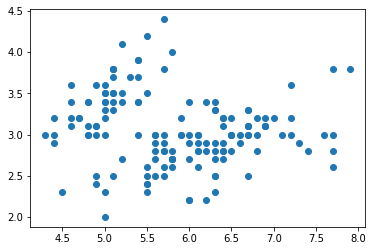

In [24]:
plt.scatter(X[:, 0], X[:, 1])
index_plot+=1
plt.show()

In [29]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)

In [20]:
ward_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

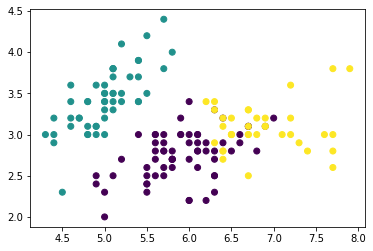

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=ward_pred)
plt.show()

In [27]:
def plot_result_clustering(X, y_pred):
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.show()

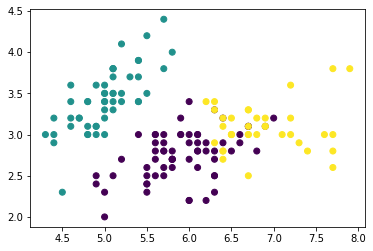

In [28]:
plot_result_clustering(X, ward_pred)

In [31]:
complete = AgglomerativeClustering(n_clusters=3,linkage='complete')
complete_pred = complete.fit_predict(X)

In [32]:
single = AgglomerativeClustering(n_clusters=3,linkage='single')
single_pred = single.fit_predict(iris.data)

In [33]:
average = AgglomerativeClustering(n_clusters=3,linkage='average')
average_pred = average.fit_predict(iris.data)

In [34]:
list_pred=[ward_pred,complete_pred,single_pred,average_pred]
name_pred=['ward','complete','single','average']

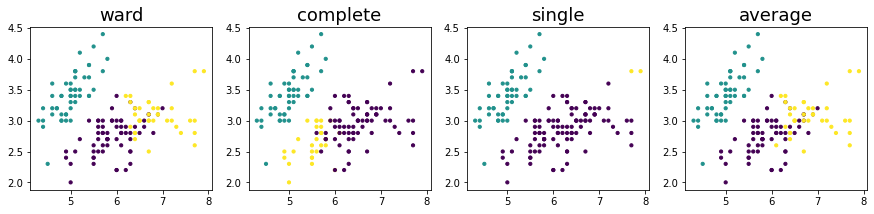

In [40]:
plt.figure(figsize=(15,3))
for i,y_pred in enumerate(list_pred):
  plt.subplot(1, len(list_pred), i+1)
  plt.title(name_pred[i], size=18)
  plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
plt.show()

## Métricas

In [45]:
from sklearn.metrics import adjusted_rand_score
import pandas as pd

In [43]:
ward_ar_score = adjusted_rand_score(Y, ward_pred)
complete_ar_score = adjusted_rand_score(Y, complete_pred)
single_ar_score = adjusted_rand_score(Y, single_pred)
average_ar_score = adjusted_rand_score(Y, average_pred)

In [46]:
df_result=pd.DataFrame(name_pred)

In [47]:
df_result['indexRand']=[ward_ar_score, complete_ar_score, single_ar_score,average_ar_score]

In [48]:
df_result

,0,indexRand
0,ward,0.731199
1,complete,0.642251
2,single,0.563751
3,average,0.759199


## Normalizando

In [71]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)

In [72]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(normalized_X)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(normalized_X)

single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(normalized_X)

In [73]:
n_ward_ar_score = adjusted_rand_score(Y, ward_pred)
n_complete_ar_score = adjusted_rand_score(Y, complete_pred)
n_avg_ar_score = adjusted_rand_score(Y, avg_pred)
n_single_ar_score = adjusted_rand_score(Y, single_pred)

In [74]:
df_result['indexRand_normalized']=[n_ward_ar_score, n_complete_ar_score, n_avg_ar_score,n_single_ar_score]

In [75]:
df_result

,0,indexRand,indexRand_normalized
0,ward,0.731199,0.885697
1,complete,0.642251,0.644447
2,single,0.563751,0.558371
3,average,0.759199,0.558371


### Visualizar con scipy

In [76]:
from scipy.cluster.hierarchy import linkage

In [93]:
linkage_type = 'ward'
dist_matrix = linkage(normalized_X, linkage_type)

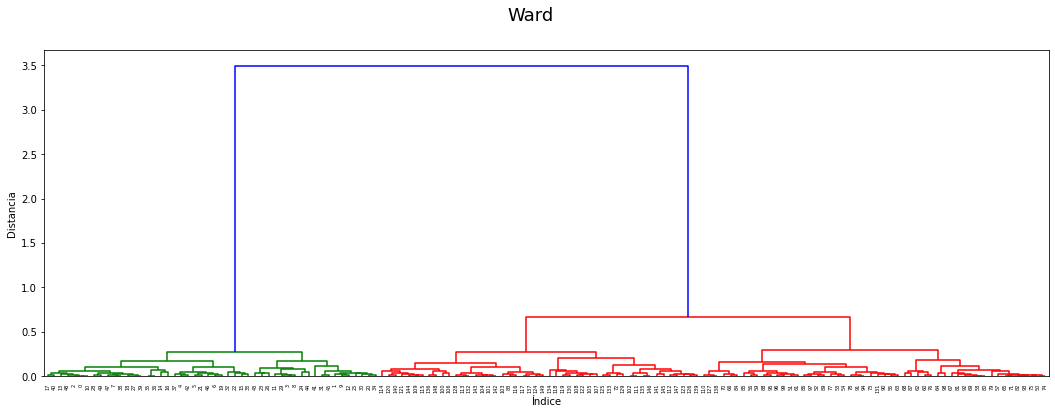

In [94]:
plt.figure(figsize=(18,6))
dendrogram(dist_matrix, leaf_rotation=90)
plt.xlabel('Índice')
plt.ylabel('Distancia')
plt.suptitle("Ward",fontsize=18)
plt.show()

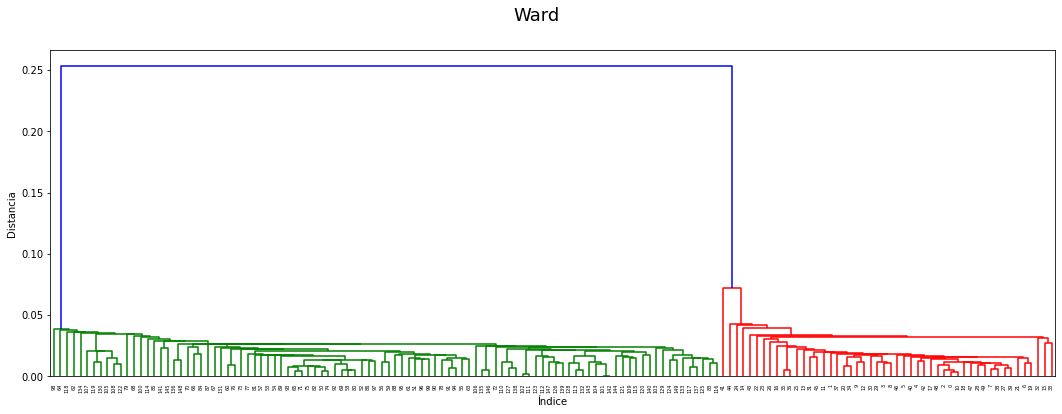

In [92]:
dist_matrix_single = linkage(normalized_X, 'single')
plt.figure(figsize=(18,6))
dendrogram(dist_matrix_single, leaf_rotation=90)
plt.xlabel('Índice')
plt.ylabel('Distancia')
plt.suptitle("Ward",fontsize=18)
plt.show()

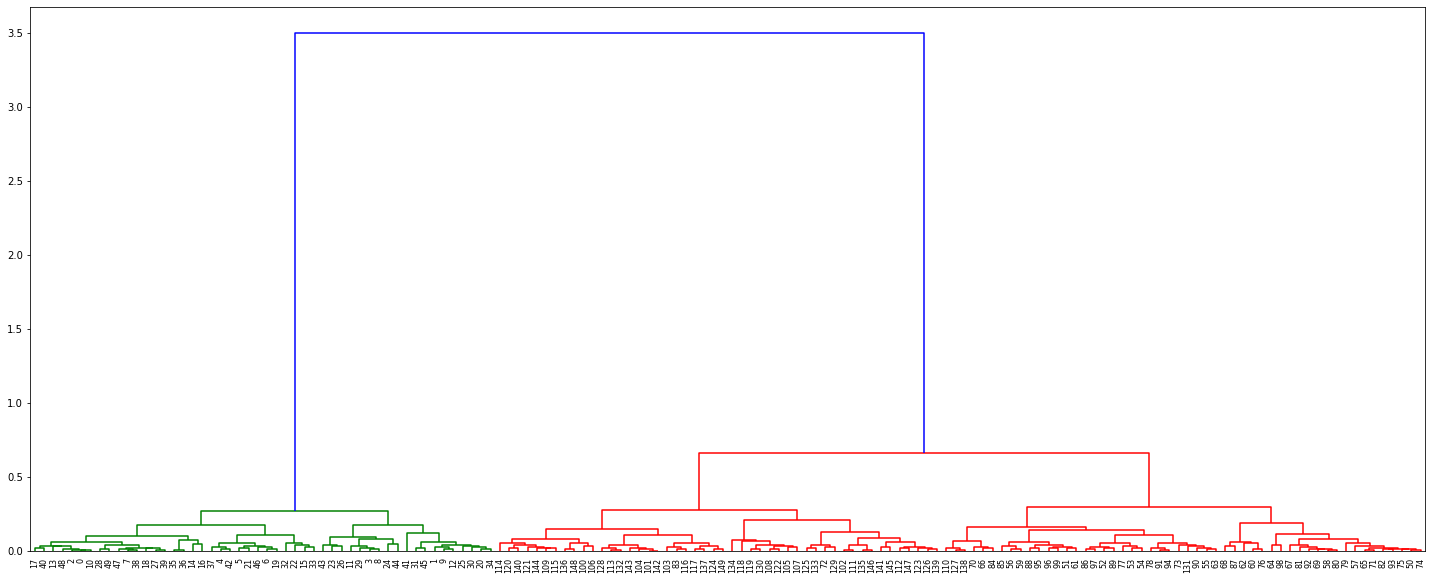

In [107]:
plt.figure(figsize=(25, 10))
dendrogram(
    dist_matrix,
    truncate_mode='lastp',  #mostrar último clusters
    p=150,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
#plt.axhline(y=max_d, c='k')
plt.show()

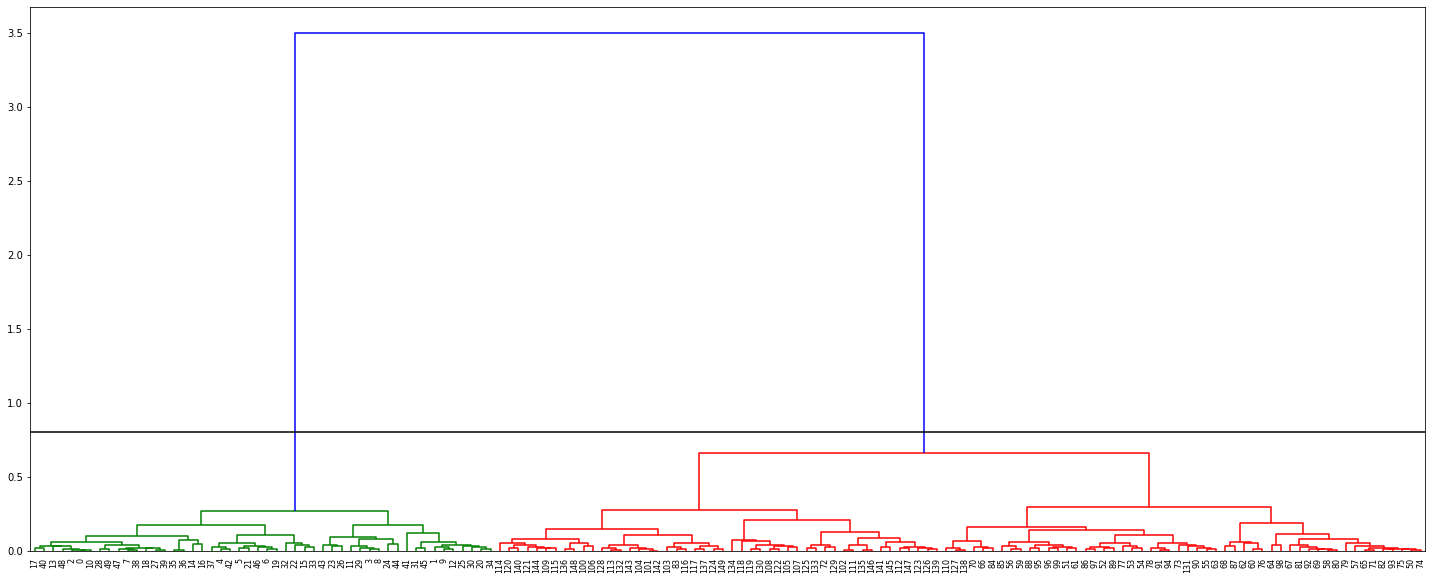

In [108]:
plt.figure(figsize=(25, 10))
dendrogram(
    dist_matrix,
    truncate_mode='lastp',  #mostrar último clusters
    p=150,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=0.8, c='k')
plt.show()

In [101]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [103]:
from scipy.cluster.hierarchy import fcluster
iris_WM=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_WM['class']=iris.target
iris_WM['2_clust']=fcluster(dist_matrix,2, criterion='maxclust')
iris_WM['3_clust']=fcluster(dist_matrix,3, criterion='maxclust')
iris_WM['4_clust']=fcluster(dist_matrix,4, criterion='maxclust')
iris_WM

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,2_clust,3_clust,4_clust
0,5.1,3.5,1.4,0.2,0,1,1,1
1,4.9,3.0,1.4,0.2,0,1,1,1
2,4.7,3.2,1.3,0.2,0,1,1,1
3,4.6,3.1,1.5,0.2,0,1,1,1
4,5.0,3.6,1.4,0.2,0,1,1,1
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,2,2
146,6.3,2.5,5.0,1.9,2,2,2,2
147,6.5,3.0,5.2,2.0,2,2,2,2
148,6.2,3.4,5.4,2.3,2,2,2,2


In [98]:
import seaborn as sns

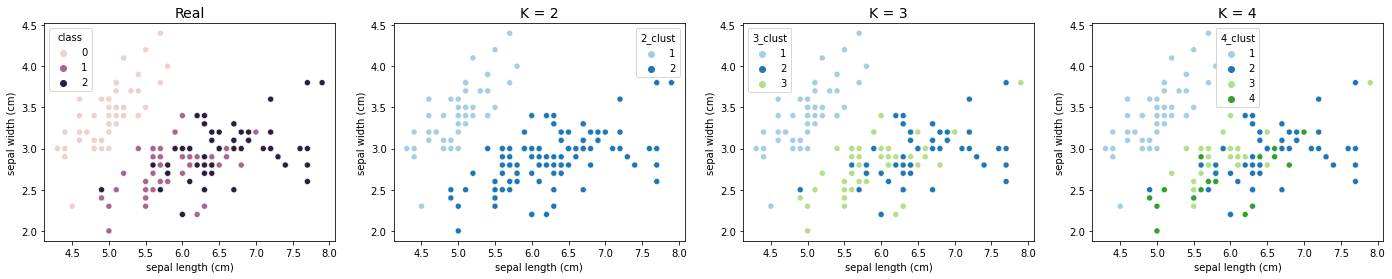

In [106]:
plt.figure(figsize=(24,4))

plt.subplot(1,4,1)
plt.title("Real",fontsize=14)
sns.scatterplot(data=iris_WM, x=iris.feature_names[0],y=iris.feature_names[1], hue="class")
k=["K = 2","K = 3","K = 4"]
hue_p=["2_clust","3_clust","4_clust"]
for i in range(3):
  plt.subplot(1,4,i+2)
  plt.title(k[i],fontsize=14)
  sns.scatterplot(data=iris_WM, x=iris.feature_names[0],y=iris.feature_names[1], hue=hue_p[i],palette="Paired")

## Kmeans

In [109]:
from sklearn.cluster import KMeans

In [123]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_pred_kmeans2=kmeans.predict(X)

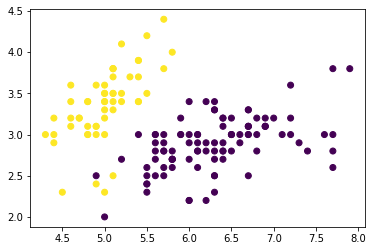

In [124]:
plt.scatter(x=X[:,0], y=X[:,1], c=y_pred_kmeans2) 

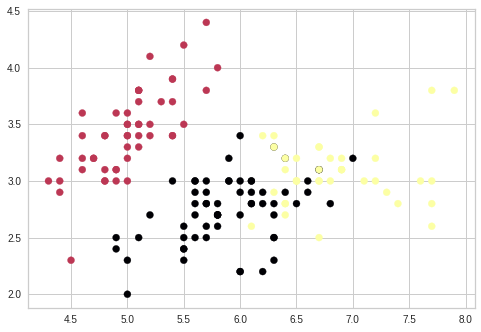

In [142]:
kmeans=KMeans(n_clusters=3, init='random')
kmeans.fit(X)
y_pred_kmeans3=kmeans.predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y_pred_kmeans3, cmap='inferno') 

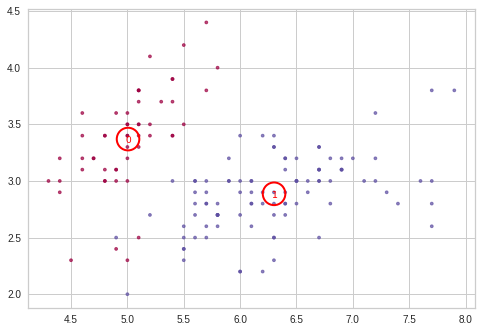

In [198]:
kmeans=KMeans(n_clusters=2, init='random')
kmeans.fit(X)
y_pred_kmeans3=kmeans.predict(X)
fig, ax = plt.subplots()
ax.scatter(x=X[:,0], y=X[:,1], c=y_pred_kmeans3, marker=".", s=30, lw=1, alpha=0.7,cmap='Spectral')
centers = kmeans.cluster_centers_
for i, c in enumerate(centers):
  circle = plt.Circle((c[0], c[1]), 0.1, color='red',lw=2, fill=False)
  ax.add_patch(circle)
  ax.plot(c[0], c[1], marker="$%d$" % i,color='red')
plt.show()


## Silueta

In [122]:
from sklearn.metrics import silhouette_score

In [126]:
kmeans=KMeans(n_clusters=4)
y_pred_kmeans4=kmeans.fit_predict(X)

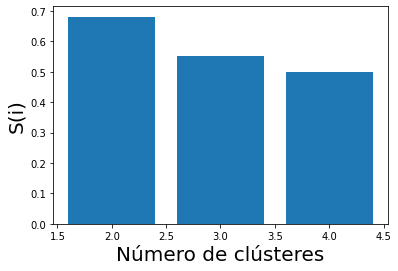

In [127]:
k = [2, 3, 4]
silhouette_scores = []
silhouette_scores.append(silhouette_score(X, y_pred_kmeans2))
silhouette_scores.append(silhouette_score(X, y_pred_kmeans3))
silhouette_scores.append(silhouette_score(X, y_pred_kmeans4))
  
plt.bar(k, silhouette_scores)
plt.xlabel('Número de clústeres', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [128]:
from yellowbrick.cluster import SilhouetteVisualizer

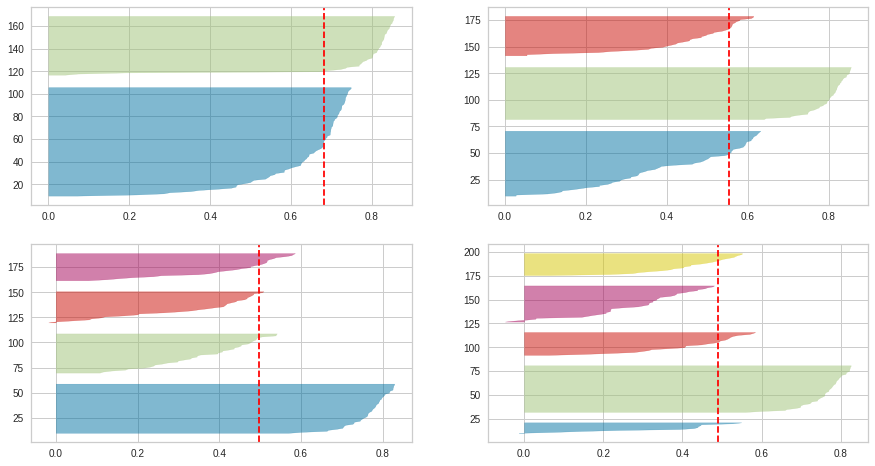

In [129]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
  q, mod = divmod(i, 2)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X) 

Es importante ver el valor de silueta que es mayor para k=2 y k=3. Por otro lado, el grosor también es decisivo, para k=3 es más uniforme, por lo que significa que los clústeres están más uniforme.

## SOM

In [204]:
!pip install minisom
from minisom import MiniSom  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=4901198c156f673df1f24604d3ec644536022773ca80846ff1d642fcd6cb7bac
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [210]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_tranform = sc.fit_transform(X)

In [212]:
som_grid_rows = 1
som_grid_columns = 5
iterations = 20000
sigma = 1
learning_rate = 0.5

In [215]:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=4, learning_rate=learning_rate)
som.random_weights_init(X)

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


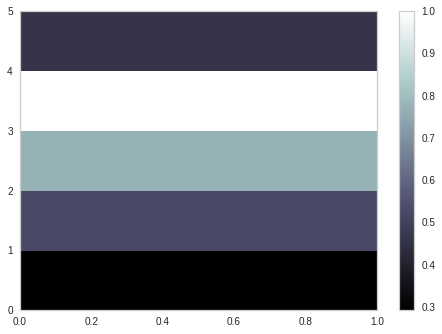

In [216]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)
colorbar()
show()

Cada neurona representa un cluster

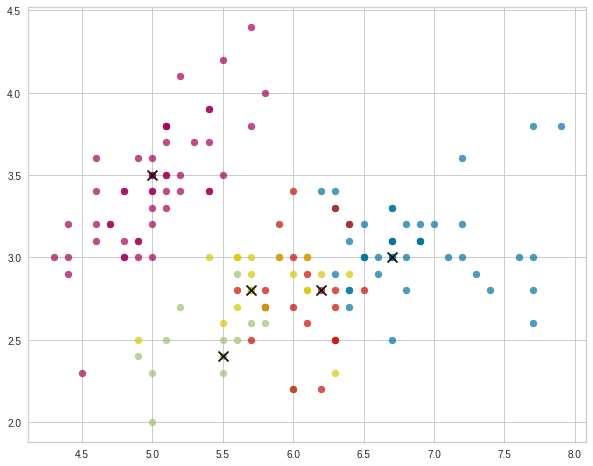

In [229]:
winner_coordinates = np.array([som.winner(x) for x in X]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (1,5))

plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=100, linewidths=20, color='k')

In [ ]:
!pip install sklearn_som

In [208]:
from sklearn_som.som import SOM

In [207]:
iris_som = SOM(m=3, n=1, dim=4)
iris_som.fit(X)

In [209]:
predictions = iris_som.predict(X)